<a href="https://colab.research.google.com/github/Varun51838/Uber-Trip-Analysis/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
from matplotlib import cm #colourmap

In [ ]:
df_apr14=pd.read_csv("/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("/uber-raw-data-sep14.csv")

In [ ]:
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [ ]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [ ]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [ ]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [ ]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,7,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


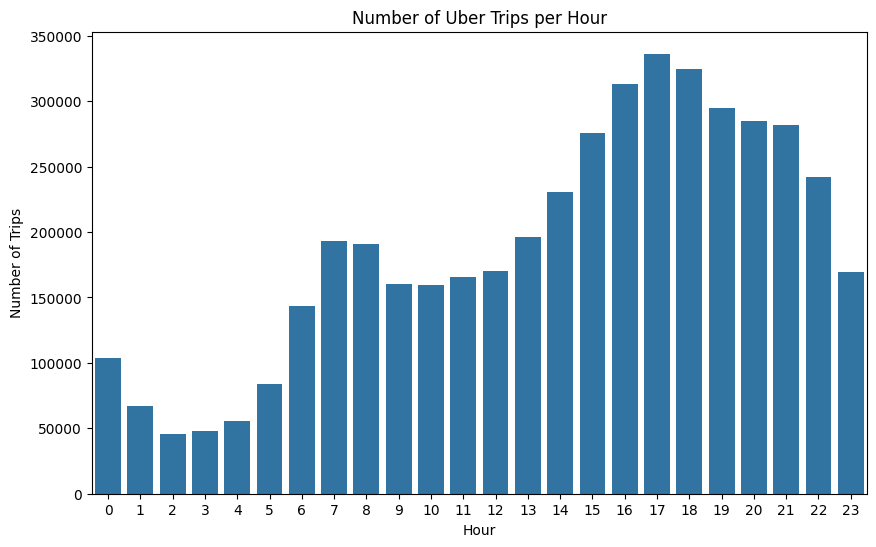

In [ ]:
# prompt: group by hour and also create a bar plot by number of trips and hours

import matplotlib.pyplot as plt
# Group data by hour and count the number of trips
hourly_trips = df.groupby('Hour')['Hour'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Uber Trips per Hour')
plt.show()


In [ ]:
# prompt: i need the answer for highest number of trips by hour and also at what hour is the peak hour

# Find the hour with the highest number of trips
max_trips = hourly_trips.max()
peak_hour = hourly_trips[hourly_trips == max_trips].index.tolist()

print(f"The highest number of trips in an hour is: {max_trips}")
print(f"The peak hour is: {peak_hour}")


The highest number of trips in an hour is: 336190
The peak hour is: [17]


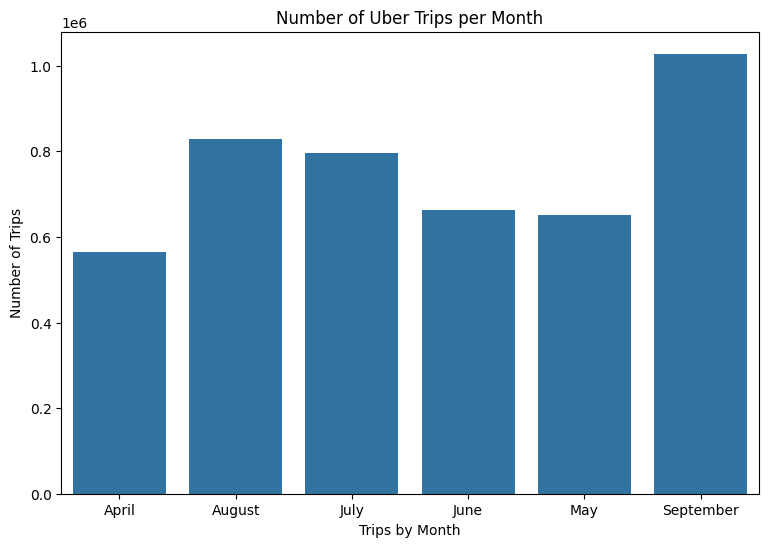

In [ ]:
# prompt: group by month and plot the chart for month and number of trips

import matplotlib.pyplot as plt
# Group data by month and count the number of trips
monthly_trips = df.groupby('Month')['Month'].count()

# Create a bar plot
plt.figure(figsize=(9, 6))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values)
plt.xlabel('Trips by Month')
plt.ylabel('Number of Trips')
plt.title('Number of Uber Trips per Month')
plt.show()


In [ ]:
# prompt: count the ratio of trips increased from august to september round off the answer

# Calculate the ratio of trips increased from August to September
aug_trips = df[df['Month'] == 'August'].shape[0]
sep_trips = df[df['Month'] == 'September'].shape[0]
ratio = round((sep_trips - aug_trips) / aug_trips,2)

print(f"The ratio of trips increased from August to September is: {ratio}")


The ratio of trips increased from August to September is: 0.24


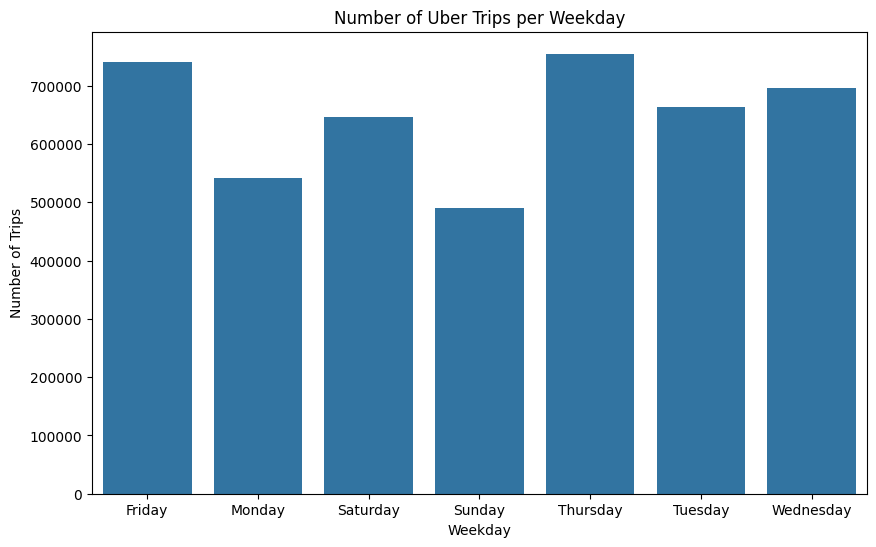

In [ ]:
# prompt: group by weekday and number of trips and also plot the chart

import matplotlib.pyplot as plt
# Group data by weekday and count the number of trips
weekday_trips = df.groupby('Weekday')['Weekday'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_trips.index, y=weekday_trips.values)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Number of Uber Trips per Weekday')
plt.show()


In [ ]:
# prompt: check the minimum number number of trips by weekday and on which day it corresponds

# Find the weekday with the minimum number of trips
min_trips = weekday_trips.min()
min_weekday = weekday_trips[weekday_trips == min_trips].index.tolist()

print(f"The minimum number of trips on a weekday is: {min_trips}")
print(f"The weekday with the minimum trips is: {min_weekday}")


The minimum number of trips on a weekday is: 490180
The weekday with the minimum trips is: ['Sunday']


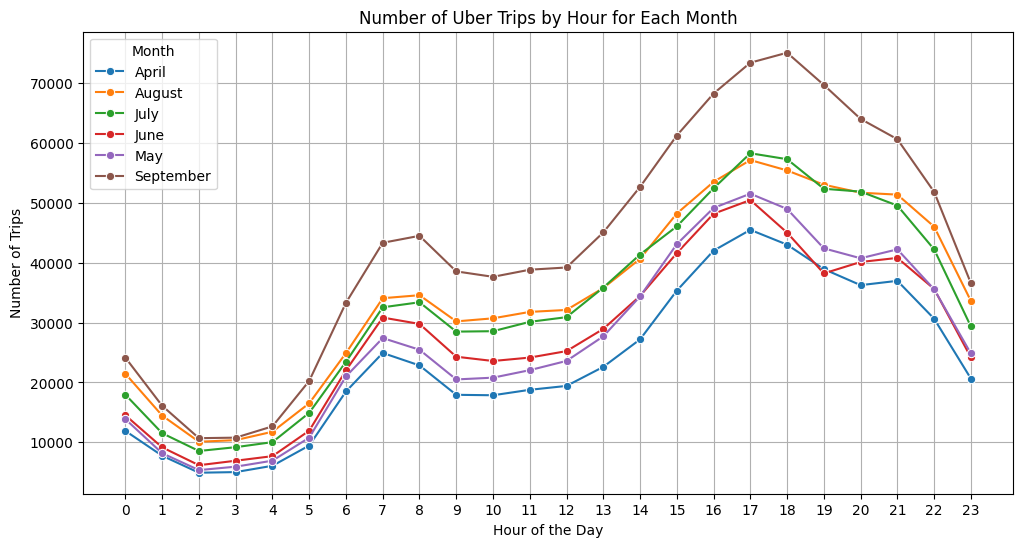

In [ ]:

# prompt: plot for hour by month with number of trips

import matplotlib.pyplot as plt
# Group data by month and hour, then count the number of trips
trips_by_month_hour = df.groupby(['Month', 'Hour'])['Hour'].count().reset_index(name='Trip Count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Trip Count', hue='Month', data=trips_by_month_hour, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Uber Trips by Hour for Each Month')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.legend(title='Month')
plt.grid(True)
plt.show()


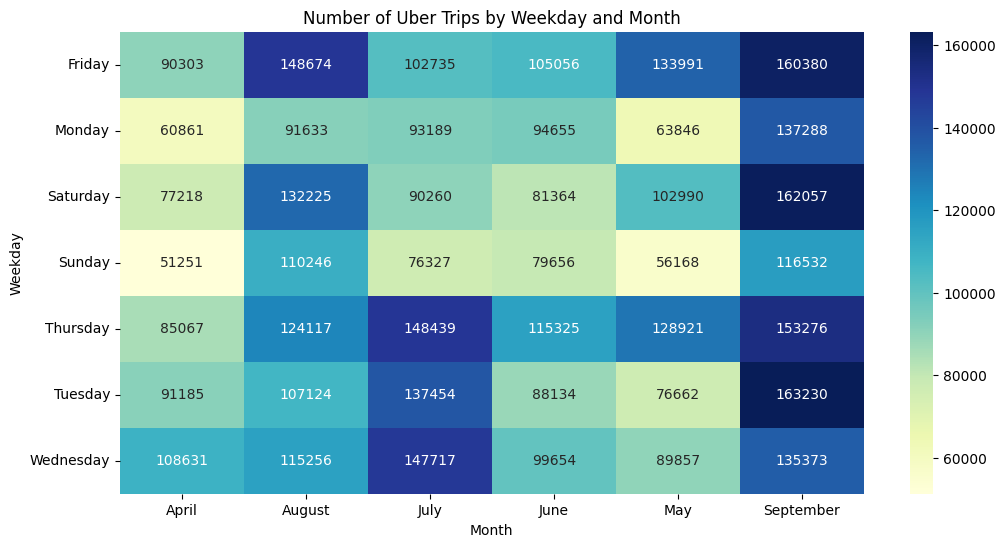

In [ ]:
# prompt: create a heatmap for above data by weekday and month

import matplotlib.pyplot as plt
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Weekday', columns='Month', values='Date_time', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap=cm.YlGnBu)
plt.title('Number of Uber Trips by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


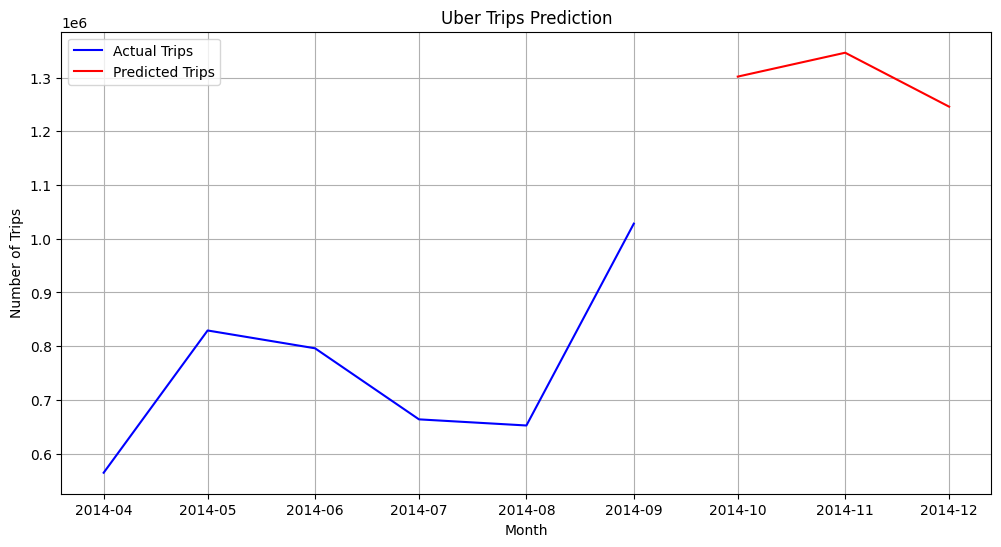

Predicted trips for the next 3 months:


,predicted_mean
2014-10-01,1.301819e+06
2014-11-01,1.346276e+06
2014-12-01,1.245848e+06


In [ ]:
# prompt: predict for next 3 months that is october november december with number of trips and also plot the graphs showing all 9 months in the graph, change the colour in graph for predicted months, use arima model

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Prepare the data for ARIMA modeling
monthly_trips_indexed = monthly_trips.copy()
monthly_trips_indexed.index = pd.to_datetime(['2014-'+str(i)+'-01' for i in range(4,10)])

# Fit the ARIMA model
model = ARIMA(monthly_trips_indexed, order=(5,1,0)) # Example order, tune for better performance
model_fit = model.fit()

# Make predictions for October, November, and December
index_future_dates = pd.date_range(start='2014-10-01', periods=3, freq='MS')
predictions = model_fit.predict(start=len(monthly_trips_indexed), end=len(monthly_trips_indexed)+2)
predicted_trips = pd.Series(predictions, index=index_future_dates)

# Combine the actual and predicted data for plotting
all_data = pd.concat([monthly_trips_indexed, predicted_trips])


# Create the plot with different colors for predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_trips_indexed.index, monthly_trips_indexed.values, label='Actual Trips', color='blue')
plt.plot(predicted_trips.index, predicted_trips.values, label='Predicted Trips', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Uber Trips Prediction')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted trips for the next 3 months:")
predicted_trips


In [ ]:
# prompt: do the interpretation for the above prediction

# Interpretation of the Uber Trips Prediction

# The code performs time series analysis on Uber trip data from April to September 2014,
# aiming to predict the number of trips for October, November, and December.

# Key Observations and Interpretations:

# 1. Hourly Trip Patterns:
#    - The bar plot of hourly trips reveals peak hours, indicating when demand is highest.
#    - Understanding peak hours is crucial for resource allocation (drivers, surge pricing).

# 2. Monthly Trip Trends:
#    - The bar plot of monthly trips shows variations in demand across months.
#    - The ratio of trip increase from August to September suggests a growth pattern, which could be due to seasonal factors or other external events.

# 3. Weekday Variations:
#    - The bar plot of weekday trips illustrates daily patterns in ridership.
#    - This helps understand day-of-the-week effects on demand.  The minimum number of trips on a particular weekday could inform strategic decisions.

# 4. Combined Monthly and Hourly Patterns:
#    - The line plots show how hourly trip patterns change from month to month.  It allows a more detailed analysis of how demand fluctuates throughout the day and the month.

# 5. Heatmap of Weekday/Month Relationships:
#    - The heatmap visualizes trip frequency across weekdays and months, highlighting any combined effects.  For example, a darker cell in the heatmap shows higher activity in a certain month and weekday combination.

# 6. ARIMA Model Prediction:
#    - An ARIMA model is used to forecast trips for October, November, and December.  ARIMA models are suited for time series data where there's a pattern of past data influencing future points.
#    - The predicted values shown for October, November, and December represent the model's estimation of future trip volumes.

# Important Considerations:

# - Model Accuracy: The accuracy of the ARIMA model depends heavily on how well the model parameters (order (p,d,q)) are chosen.  The prediction may not be very accurate if the model is not tuned well.  Other time series models or machine learning methods may give a better result.

# - External Factors: The model doesn't account for external factors like weather, special events, holidays, or changes in Uber's operations that might influence future demand.  Including such information in the model could improve its predictive power.
#
# - Data Limitations: The model is trained on six months of data.  A longer history might improve predictions.  The model may not be representative of long-term trends.

# In summary, the analysis provides insights into Uber's trip patterns and attempts to predict future demand.  However, interpreting the prediction must be done with caution due to factors mentioned above.


In [ ]:
# prompt: show lat, lon of busiest areas on US map using folium

import pandas as pd
import folium

# Assuming 'df' is your DataFrame with 'Lat' and 'Lon' columns
# and you've already processed it (e.g., grouped by location and counted trips)

# Sample data (replace with your actual data)
busiest_areas = pd.DataFrame({
    'Lat': [40.7128, 40.7580, 40.7306],
    'Lon': [-74.0060, -73.9855, -73.9974],
    'Trip_Count': [1000, 800, 600]  # Example trip counts
})


# Create a map centered on the US
map_us = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


# Add markers for the busiest areas
for index, row in busiest_areas.iterrows():
  folium.CircleMarker(
      location=[row['Lat'], row['Lon']],
      radius=row['Trip_Count'] / 100,  # Scale radius by trip count
      color='blue',
      fill=True,
      fill_color='blue',
      fill_opacity=0.6,
      popup=f"Lat: {row['Lat']}, Lon: {row['Lon']}, Trips: {row['Trip_Count']}"
  ).add_to(map_us)

# Display the map
map_us
